## We are going to select the dataset of the 2022 Hackathon MWC Barcelona (Mobile World Congress)

## Dataset Information:
## 🖥 RETO
### Background  
Nuwefruit es una startup que busca revolucionar los hábitos de la población fomentando el cosumo de fruta a diario. Por este motivo, la empresa está especializada en la venta de fruta a domicilio, que gracias a su algoritmo de optimización de la última milla le permite tener unos costes logisticos muy bajos. Esto permite que Nuwefruit pueda vender fruta a un precio inferior al de su competencia. Su catálogo se basa en la venta de más de 20 tipos de frutas, que son las que presentan las mejores propiedades nutritivas.

### Overview: the dataset and challenge

Se emplearan dos datasets: el primero contiene datos de los clientes de Nuwefruit y el otro contiene los datos de los pedidos realizados por estos.

El dataset de clientes 'CLIENT TABLE' contiene las siguientes variables:


|Columna  |Descripción  |
|---------|---------|
|CLIENT ID:| Identificador único del cliente  
|CLIENT_SEGMENT:| Segmento de clientes  
|AVG CONSO: | Consumo medio mensual del cliente calculado a finales de 2020 (en piezas de fruta)
|AVG BASKET SIZE: |Tamaño medio de la cesta del cliente calculado a finales de 2020 (en piezas de fruta)
|RECEIVED_COMMUNICATION:| 1 = Recibió promoción de sus productos / 0 = no la recibió

El dataset de clientes 'ORDERS TABLE' contiene las siguientes variables:

|Columna  |Descripción  |
|---------|---------|
|CLIENT ID:| Identificador único del cliente
NB PRODS:| Número de 'prods' de la variedad de fruta en el pedido (1 prod = 10 piezas de fruta)
ORDER ID:| Identificador único del pedido
FRUIT_PRODUCT:| Variedad de fruta


### Objetivos
Haz un analisis exploratorio de los datos que permita:
- Analizar las ventas y la actividad de los clientes
- Evaluar el impacto de la promoción
- Realiza un modelo predictivo que permita conocer el tipo de segmento al que pertenece cada cliente en función de las siguientes variables predictoras: Descargar test_x. (Se ha de predecir la variable (CLIENT_SEGMENT)).
### Evaluación
- 900 puntos -> Objetivos. Los objetivos se evaluarán en función del EDA realizado y del f1-score(macro) obtenido al comparar las predicciones de tu algoritmo cuando se les mete como input las variables del dataset 'test_x'.
- 200 puntos -> Cálidad del código
- 100 puntos -> Documentación

### Entrega
Has de pegar el link a tu repositorio.

Este ha de tener:

- El código con el que has realizado el EDA y el modelo predictivo.

- Un archivo 'results.csv' con las predicciones de tu algoritmo al meterle como input el dataset test_x. Este archivo con los resultados ha de tener una columna con el 'CLIENT ID' y otra con las predicciones del 'CLIENT_SEGMENT'. Tal y como en el siguiente ejemplo: Ejemplo results.csv



In [1]:
# Import libraries
import numpy as np
import pandas as pd

In [2]:
# Importar los datasets
df_clients = pd.read_csv("mwc22-client_table.csv", decimal = ',')
df_orders = pd.read_csv("mwc22-orders_table.csv")
df_clients_test_x = pd.read_csv("mwc22-client_table+-+test_x.csv", decimal = ',')

In [3]:
# Limpieza de nombres de columnas df_clients
df_clients.columns = df_clients.columns.str.lower()
df_clients.columns = df_clients.columns.str.replace(" ","_")
df_clients.rename_axis('client_id', inplace=True)
df_clients.columns

Index(['client_id', 'client_segment', 'avg_conso', 'avg_basket_size',
       'received_communication'],
      dtype='object')

In [4]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35884 entries, 0 to 35883
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   client_id               35884 non-null  int64  
 1   client_segment          35884 non-null  int64  
 2   avg_conso               35884 non-null  float64
 3   avg_basket_size         35884 non-null  float64
 4   received_communication  35884 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1.4 MB


In [5]:
# Ordenamos df_clients por client_id para poderlo cruzar posteriormente con df_orders
df_clients.sort_index(inplace=True)

In [6]:
round(df_clients.describe(include='all'),2)

,client_id,client_segment,avg_conso,avg_basket_size,received_communication
count,35884.00,35884.00,35884.00,35884.00,35884.00
mean,27060578.92,3.12,64.53,181.22,0.51
std,8835076.38,1.51,64.38,129.60,0.50
min,18073108.00,1.00,0.83,10.00,0.00
25%,20533114.25,2.00,20.83,100.00,0.00
50%,24621903.00,3.00,50.00,160.00,1.00
75%,32985383.25,4.00,88.17,225.00,1.00
max,48365940.00,6.00,2433.33,3400.20,1.00


In [7]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35884 entries, 0 to 35883
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   client_id               35884 non-null  int64  
 1   client_segment          35884 non-null  int64  
 2   avg_conso               35884 non-null  float64
 3   avg_basket_size         35884 non-null  float64
 4   received_communication  35884 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1.4 MB


In [8]:
# Analicemos clientes por segmento:
# Segmento 1
round(df_clients[df_clients.client_segment == 1].describe())

,client_id,client_segment,avg_conso,avg_basket_size,received_communication
count,6505.0,6505.0,6505.0,6505.0,6505.0
mean,25235657.0,1.0,132.0,190.0,1.0
std,7702437.0,0.0,59.0,85.0,0.0
min,18073426.0,1.0,38.0,20.0,0.0
25%,20088062.0,1.0,94.0,137.0,0.0
50%,22080309.0,1.0,118.0,186.0,1.0
75%,25224299.0,1.0,156.0,220.0,1.0
max,48365940.0,1.0,863.0,1400.0,1.0


In [9]:
# Analicemos clientes por segmento:
# Segmento 2
round(df_clients[df_clients.client_segment == 2].describe())

,client_id,client_segment,avg_conso,avg_basket_size,received_communication
count,6760.0,6760.0,6760.0,6760.0,6760.0
mean,24950805.0,2.0,87.0,299.0,1.0
std,7229937.0,0.0,42.0,142.0,0.0
min,18073108.0,2.0,17.0,138.0,0.0
25%,20146497.0,2.0,67.0,203.0,0.0
50%,22160765.0,2.0,79.0,252.0,1.0
75%,25188019.0,2.0,100.0,343.0,1.0
max,48341766.0,2.0,1417.0,3400.0,1.0


In [10]:
# Analicemos clientes por segmento:
# Segmento 3
round(df_clients[df_clients.client_segment == 3].describe())

,client_id,client_segment,avg_conso,avg_basket_size,received_communication
count,8123.0,8123.0,8123.0,8123.0,8123.0
mean,26742342.0,3.0,43.0,164.0,1.0
std,8769539.0,0.0,14.0,71.0,0.0
min,18073566.0,3.0,10.0,23.0,0.0
25%,20337075.0,3.0,33.0,112.0,0.0
50%,24528266.0,3.0,42.0,152.0,1.0
75%,30569144.0,3.0,51.0,200.0,1.0
max,48365861.0,3.0,152.0,750.0,1.0


In [11]:
# Analicemos clientes por segmento:
# Segmento 4
round(df_clients[df_clients.client_segment == 4].describe())

,client_id,client_segment,avg_conso,avg_basket_size,received_communication
count,7927.0,7927.0,7927.0,7927.0,7927.0
mean,28812316.0,4.0,21.0,105.0,0.0
std,9526237.0,0.0,11.0,55.0,0.0
min,18073366.0,4.0,1.0,10.0,0.0
25%,21184109.0,4.0,13.0,67.0,0.0
50%,24906197.0,4.0,19.0,100.0,0.0
75%,37547663.0,4.0,26.0,125.0,1.0
max,48352001.0,4.0,167.0,500.0,1.0


In [12]:
# Analicemos clientes por segmento:
# Segmento 5
round(df_clients[df_clients.client_segment == 5].describe())

,client_id,client_segment,avg_conso,avg_basket_size,received_communication
count,3429.0,3429.0,3429.0,3429.0,3429.0
mean,30969708.0,5.0,7.0,57.0,0.0
std,9555924.0,0.0,3.0,31.0,0.0
min,18073647.0,5.0,1.0,10.0,0.0
25%,24538496.0,5.0,4.0,35.0,0.0
50%,25239187.0,5.0,6.0,50.0,0.0
75%,40643778.0,5.0,8.0,75.0,0.0
max,48351979.0,5.0,21.0,200.0,1.0


In [13]:
# Analicemos clientes por segmento:
# Segmento 6
round(df_clients[df_clients.client_segment == 6].describe())

,client_id,client_segment,avg_conso,avg_basket_size,received_communication
count,3140.0,3140.0,3140.0,3140.0,3140.0
mean,27515291.0,6.0,103.0,282.0,1.0
std,9358602.0,0.0,117.0,199.0,0.0
min,18073169.0,6.0,1.0,10.0,0.0
25%,20366426.0,6.0,33.0,150.0,0.0
50%,24581005.0,6.0,75.0,233.0,1.0
75%,35378272.0,6.0,138.0,360.0,1.0
max,48335598.0,6.0,2433.0,2655.0,1.0


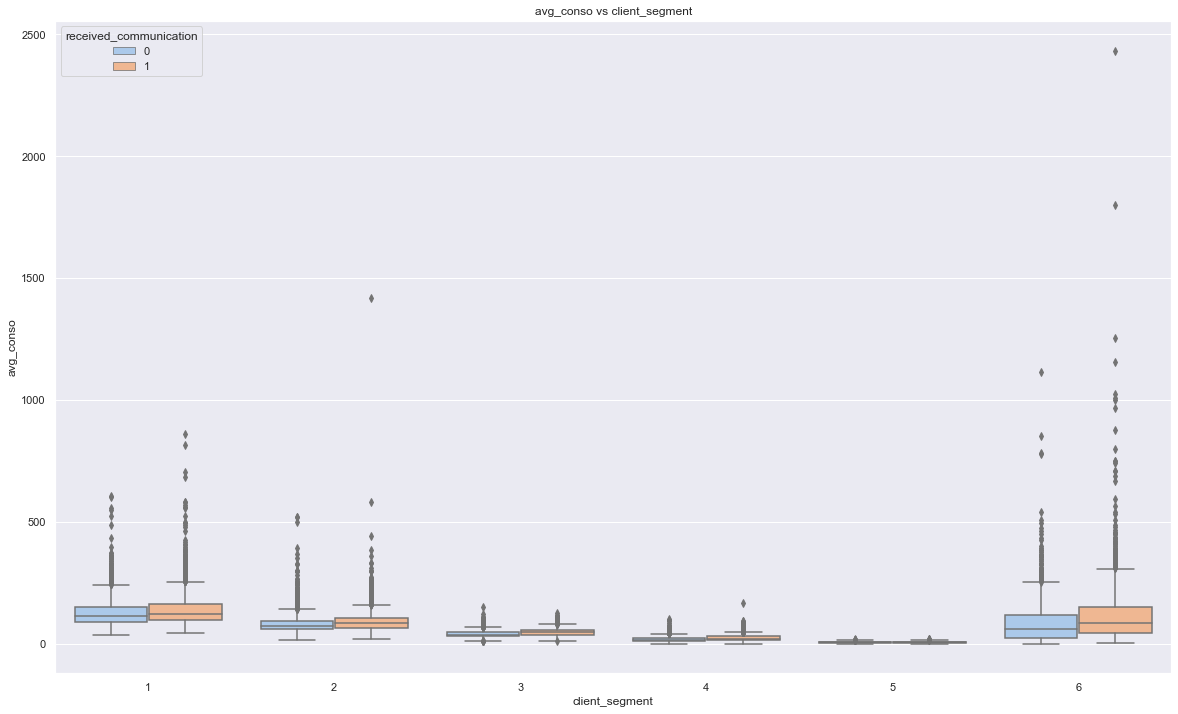

In [19]:
# Estos datos discrepantes se verán bien agrupando por cliente y haciendo gráficos boxplot para avg_conso y avg_basket_size.
# |AVG CONSO: | Consumo medio mensual del cliente calculado a finales de 2020 (en piezas de fruta)
# |AVG BASKET SIZE: |Tamaño medio de la cesta del cliente calculado a finales de 2020 (en piezas de fruta)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(palette="pastel")
fig = plt.subplots(figsize=(20,12))
plt.title("avg_conso vs client_segment")
sns.boxplot(x = 'client_segment',y = 'avg_conso', hue = 'received_communication', data = df_clients);


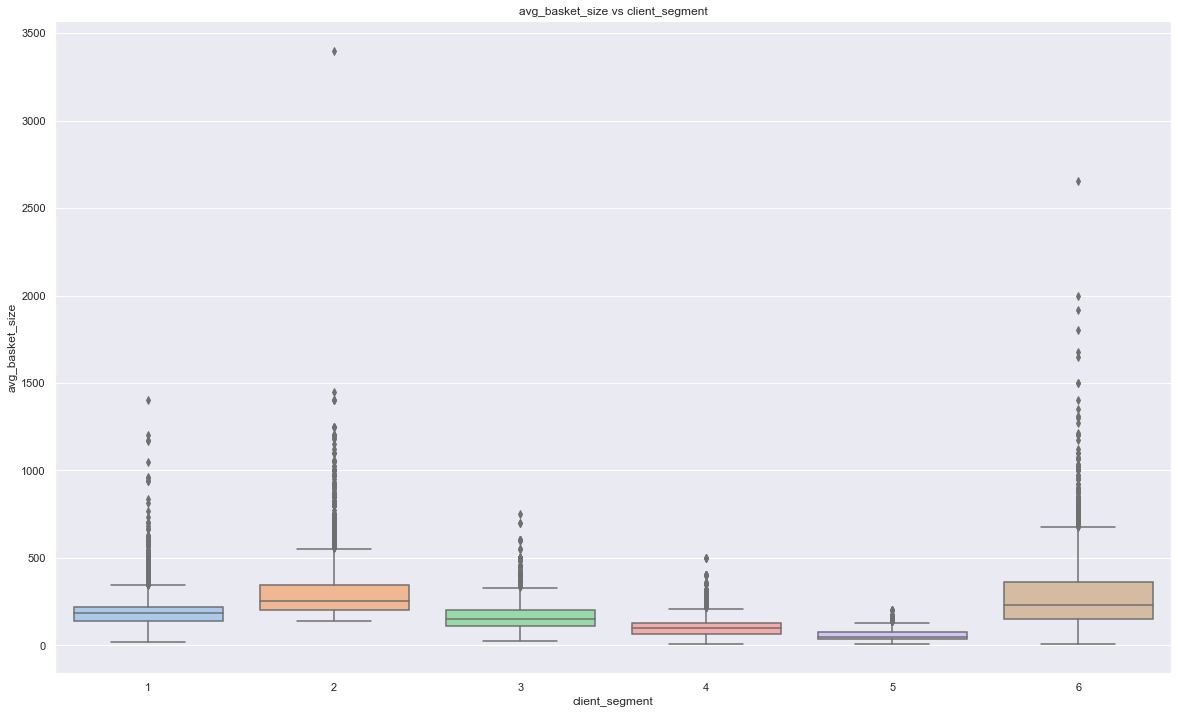

In [20]:
import seaborn as sns
sns.set_theme(palette="pastel")
fig, ax = plt.subplots(figsize=(20,12))
plt.title("avg_basket_size vs client_segment")
sns.boxplot(x = 'client_segment',y = 'avg_basket_size',data = df_clients);

## df_orders
-----------

In [16]:
# Limpieza de nombres de columnas df_orders
df_orders.columns = df_orders.columns.str.lower()
df_orders.columns = df_orders.columns.str.replace(" ","_")
df_orders.rename_axis('client_id', inplace=True)
df_orders.columns

Index(['client_id', 'nb_prods', 'order_id', 'fruit_product'], dtype='object')

In [17]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66912 entries, 0 to 66911
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   client_id      66912 non-null  int64 
 1   nb_prods       66912 non-null  int64 
 2   order_id       66912 non-null  int64 
 3   fruit_product  66912 non-null  object
dtypes: int64(3), object(1)
memory usage: 2.0+ MB


In [18]:
round(df_orders.describe(include='all'),2)

,client_id,nb_prods,order_id,fruit_product
count,66912.00,66912.00,6.691200e+04,66912
unique,NaN,NaN,NaN,24
top,NaN,NaN,NaN,Kiwi
freq,NaN,NaN,NaN,6431
mean,26134065.11,4.53,6.722533e+08,NaN
std,8473596.01,5.79,3.205826e+06,NaN
min,18070505.00,-80.00,6.638335e+08,NaN
25%,20174269.00,1.00,6.694803e+08,NaN
50%,24380549.00,3.00,6.719971e+08,NaN
75%,25387075.00,5.00,6.750893e+08,NaN
